In [305]:
# # 한글폰트
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
!apt-get update -qq
!apt-get install fonte-nanum* -qq

import matplotlib.font_manager as fm
fm._rebuild()

# 한글 폰트 확인하기
for fontInfo in fm.fontManager.ttflist:
  if 'Nanum' in fontInfo.name:
    print(fontInfo.name + ' = '+fontInfo.fname)

plt.rc('font', family = 'NanumGothic')

# 패키지 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

E: Unable to locate package fonte-nanum*
E: Couldn't find any package by glob 'fonte-nanum*'
E: Couldn't find any package by regex 'fonte-nanum*'
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareR.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothic.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareB.ttf


In [306]:
data = pd.read_csv('/content/drive/MyDrive/Proj_WT/DataSets/Seoul/SWeatherTour3yrs.csv')
data.head()

,일시,평균기온(°C),평균최고기온(°C),평균최저기온(°C),최고기온(°C),최저기온(°C),최고기온 나타난날(yyyymmdd),최저기온 나타난날(yyyymmdd),평균현지기압(hPa),평균해면기압(hPa),최고해면기압(hPa),최저해면기압(hPa),최고해면기압 나타난날(yyyymmdd),최저해면기압 나타난날(yyyymmdd),평균수증기압(hPa),최고수증기압(hPa),최저수증기압(hPa),최고수증기압 나타난날(yyyymmdd),최저수증기압 나타난날(yyyymmdd),평균이슬점온도(°C),평균상대습도(%),최소상대습도(%),최소상대습도 나타난날(yyyymmdd),월합강수량(00~24h만)(mm),일최다강수량(mm),1시간최다강수량(mm),10분최다강수량(mm),일최다강수량 나타난날(yyyymmdd),1시간최다강수량 나타난날(yyyymmdd),10분최다강수량 나타난날(yyyymmdd),소형총증발량(mm),소형일최대증발량(mm),대형총증발량(mm),대형일최대증발량(mm),소형일최대증발량 나타난날(yyyymmdd),대형일최대증발량 나타난날(yyyymmdd),평균풍속(m/s),최대풍속(m/s),최대순간풍속(m/s),최대풍속 풍향(16방위),최대순간풍속 풍향(16방위),최대풍속 나타난날(yyyymmdd),최대순간풍속 나타난날(yyyymmdd),최다풍향(16방위),평균운량(1/10),평균중하층운량(1/10),합계 일조시간(hr),일조율(%),합계 일사량(MJ/m2),최심적설(cm),최심신적설(cm),3시간신적설합(cm),최심적설 나타난날(yyyymmdd),최심신적설 나타난날(yyyymmdd),평균 최저초상온도(°C),최저초상온도(°C),최저초상온도 나타난날(yyyymmdd),평균지면온도(°C),0.05m평균지중온도(°C),0.1m평균지중온도(°C),0.2m평균지중온도(°C),0.3m평균지중온도(°C),0.5m평균지중온도(°C),1.0m평균지중온도(°C),1.5m평균지중온도(°C),3.0m평균지중온도(°C),5.0m평균지중온도(°C),서울_종로구_경복궁,서울_종로구_종묘,서울_종로구_창경궁,서울_종로구_창덕궁,서울_중구_남산골한옥마을,서울_중구_덕수궁,서울_중구_서울시립미술관 본관,서울_용산구_국립중앙박물관,서울_노원구_태릉 · 강릉 · 조선왕릉전시관,서울_서대문구_서대문형무소역사관,서울_마포구_트릭아이미술관,서울_서초구_헌릉ㆍ인릉,서울_강남구_선릉·정릉
0,201701,-1.8,2.9,-5.8,11.4,-12.6,20170106,20170123,1014.7,1025.6,1036.9,1011.9,20170125,20170108,3.2,7.8,0.9,20170102,20170115,-10.3,55,17,20170128,14.9,4.5,NaN,NaN,20170129,NaN,NaN,52.2,2.5,36.7,1.7,20170112,20170112.0,2.3,7.0,13.1,290,270,20170114,20170110,270,3.5,2.3,209.0,67.97,256.11,6.6,6.6,14.3,20170120.0,20170120.0,-9.6,-18.8,20170124,-0.7,0.2,0.8,1.7,2.5,3.4,6.1,8.9,14.5,16.9,165237,12773,24650,56789,44580,69402,77496,456498,1659,27598,6671,1227,13241
1,201702,-0.2,4.8,-4.7,12.3,-9.3,20170228,20170210,1012.6,1023.5,1034.4,1006.1,20170214,20170220,3.3,10.6,1.2,20170216,20170202,-9.2,54,18,20170227,11.1,5.1,NaN,NaN,20170222,NaN,NaN,63.1,3.9,44.2,2.8,20170227,20170227.0,2.4,7.8,12.3,290,290,20170220,20170220,270,2.8,2.0,210.0,69.31,311.86,0.8,NaN,NaN,20170201.0,NaN,-8.6,-13.5,20170213,1.0,0.6,0.5,1.1,1.5,2.0,4.2,6.7,12.4,15.7,155014,9809,22077,50218,52138,67840,76071,344705,1635,25727,6561,1272,14417
2,201703,6.3,12.3,1.7,18.9,-5.3,20170319,20170308,1009.0,1019.6,1028.6,1009.3,20170319,20170309,4.5,10.4,1.5,20170331,20170307,-4.9,48,15,20170318,7.9,5.0,NaN,NaN,20170301,NaN,NaN,116.9,5.4,81.8,3.8,20170319,20170319.0,2.4,8.5,17.9,320,320,20170327,20170327,270,3.9,1.8,255.2,68.73,444.90,NaN,NaN,NaN,NaN,NaN,-2.7,-8.7,20170308,8.1,7.1,6.9,6.8,6.7,6.5,6.6,7.5,11.0,14.4,165143,15581,37464,72277,59487,68205,83788,229109,3766,62661,3467,2738,30410
3,201704,13.9,20.0,9.1,27.8,3.1,20170430,20170402,1002.6,1012.8,1025.8,995.4,20170404,20170418,8.0,14.5,1.3,20170430,20170412,2.9,52,10,20170412,61.6,37.5,8.5,2.5,20170405,20170405.0,20170418.0,165.8,9.1,116.1,6.4,20170426,20170426.0,2.6,8.1,15.6,200,180,20170414,20170414,270,4.4,2.3,259.7,65.66,488.91,NaN,NaN,NaN,NaN,NaN,5.2,-1.5,20170403,16.9,14.7,14.1,13.5,13.2,12.8,11.5,11.0,11.3,13.5,351637,21154,118778,168988,97634,120740,60072,235668,12765,55776,4081,4515,45239
4,201705,19.5,25.4,14.4,30.3,10.0,20170530,20170506,1002.0,1012.0,1022.9,999.1,20170503,20170531,11.4,18.9,2.8,20170531,20170506,8.3,52,7,20170530,16.1,6.0,6.0,3.5,20170513,20170513.0,20170513.0,215.3,9.9,150.4,7.0,20170519,20170519.0,2.4,8.5,15.7,230,180,20170513,20170513,270,3.9,2.0,301.5,68.48,645.35,NaN,NaN,NaN,NaN,NaN,10.3,4.5,20170506,25.0,21.3,20.7,19.6,19.0,18.8,16.6,15.1,12.7,13.3,355030,70624,96047,146783,91142,144608,53506,260195,16748,91425,6792,3660,37342


# 논문에 있는 feature 뽑아내기

In [307]:
# 평균기온, 최고기온, 최소상대습도, 평균상대습도, 총 강수량, 평균풍속, 일조시간과 target변수들을 뽑아낸다.
data = data[['일시','평균기온(°C)','최고기온(°C)','최소상대습도(%)','평균상대습도(%)','월합강수량(00~24h만)(mm)','평균풍속(m/s)','합계 일조시간(hr)','서울_종로구_경복궁', '서울_종로구_종묘', '서울_종로구_창경궁', '서울_종로구_창덕궁',
       '서울_중구_남산골한옥마을', '서울_중구_덕수궁', '서울_중구_서울시립미술관 본관', '서울_용산구_국립중앙박물관',
       '서울_노원구_태릉 ·  강릉 · 조선왕릉전시관', '서울_서대문구_서대문형무소역사관', '서울_마포구_트릭아이미술관',
       '서울_서초구_헌릉ㆍ인릉', '서울_강남구_선릉·정릉']]

In [308]:
data=data.rename(columns = {'평균기온(°C)':'평균기온', '최고기온(°C)':'최고기온','최소상대습도(%)':'최저상대습도','평균상대습도(%)':'평균상대습도', '월합강수량(00~24h만)(mm)':'총강수량','평균풍속(m/s)':'평균풍속','합계 일조시간(hr)':'일조시간'})

In [309]:
data.head()

,일시,평균기온,최고기온,최저상대습도,평균상대습도,총강수량,평균풍속,일조시간,서울_종로구_경복궁,서울_종로구_종묘,서울_종로구_창경궁,서울_종로구_창덕궁,서울_중구_남산골한옥마을,서울_중구_덕수궁,서울_중구_서울시립미술관 본관,서울_용산구_국립중앙박물관,서울_노원구_태릉 · 강릉 · 조선왕릉전시관,서울_서대문구_서대문형무소역사관,서울_마포구_트릭아이미술관,서울_서초구_헌릉ㆍ인릉,서울_강남구_선릉·정릉
0,201701,-1.8,11.4,17,55,14.9,2.3,209.0,165237,12773,24650,56789,44580,69402,77496,456498,1659,27598,6671,1227,13241
1,201702,-0.2,12.3,18,54,11.1,2.4,210.0,155014,9809,22077,50218,52138,67840,76071,344705,1635,25727,6561,1272,14417
2,201703,6.3,18.9,15,48,7.9,2.4,255.2,165143,15581,37464,72277,59487,68205,83788,229109,3766,62661,3467,2738,30410
3,201704,13.9,27.8,10,52,61.6,2.6,259.7,351637,21154,118778,168988,97634,120740,60072,235668,12765,55776,4081,4515,45239
4,201705,19.5,30.3,7,52,16.1,2.4,301.5,355030,70624,96047,146783,91142,144608,53506,260195,16748,91425,6792,3660,37342


# EDA


## 종속변수 확인하기

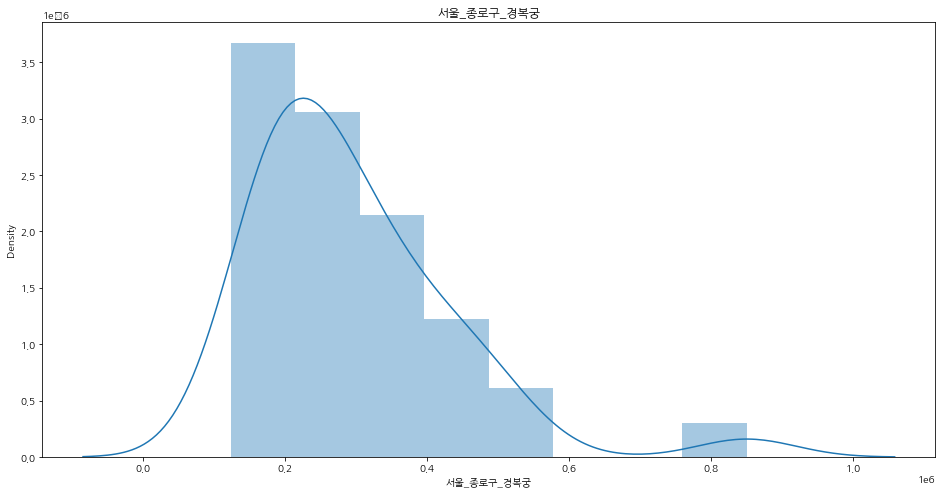

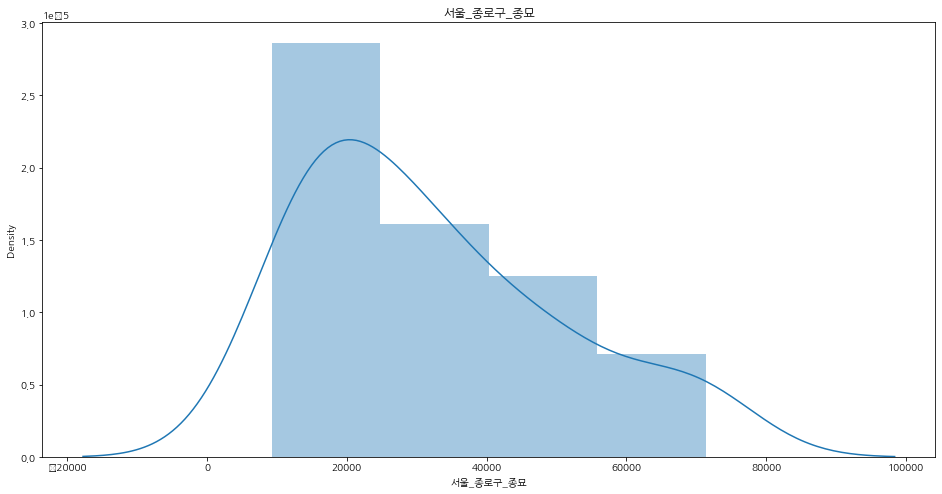

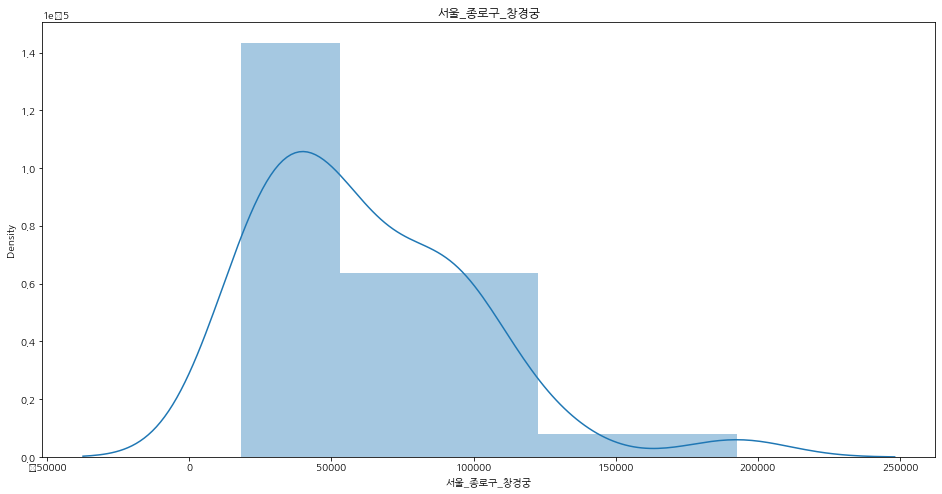

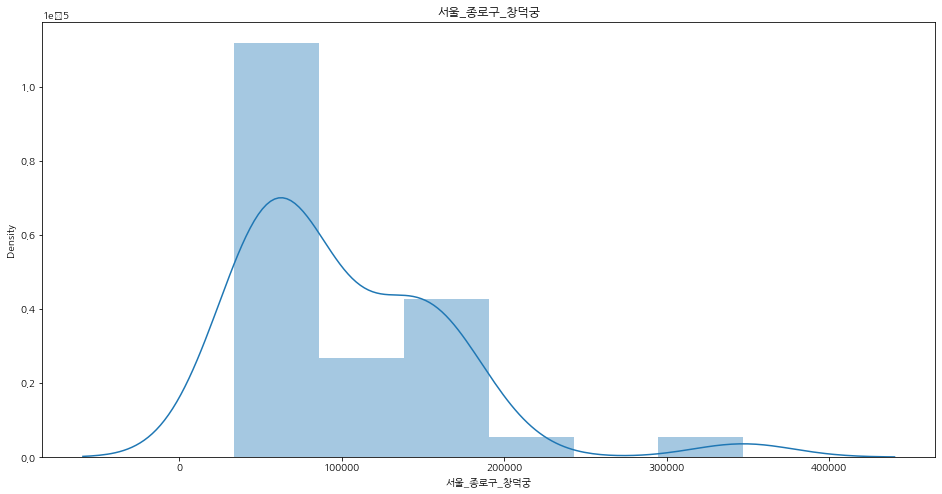

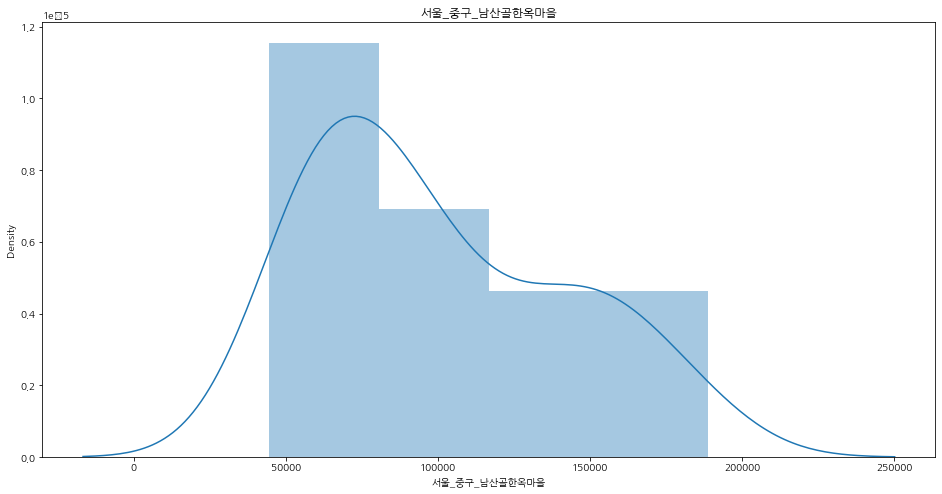

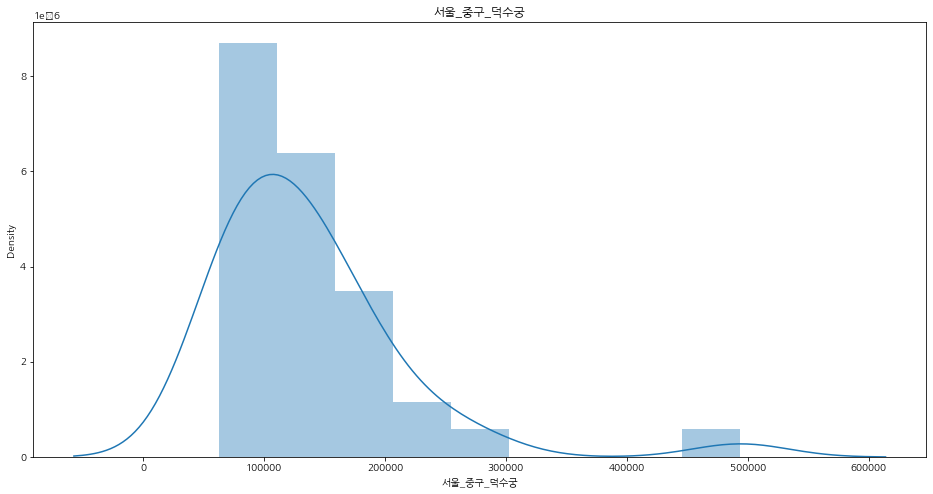

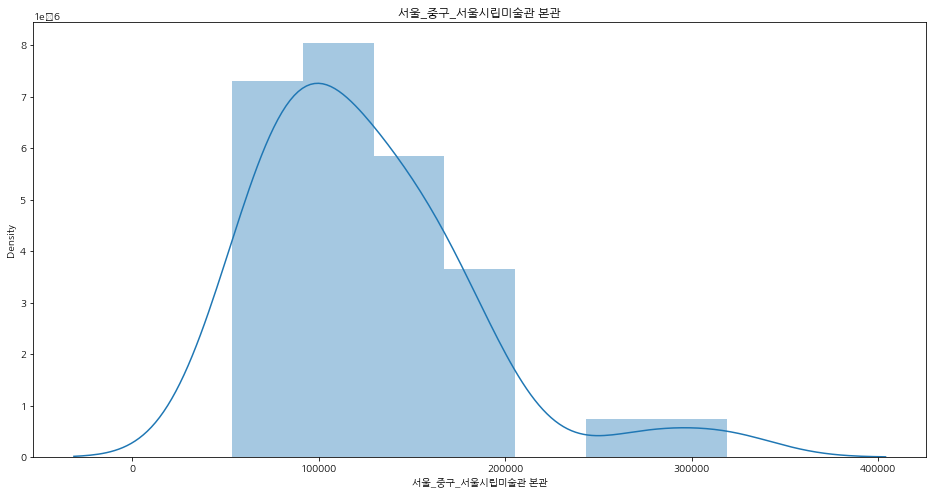

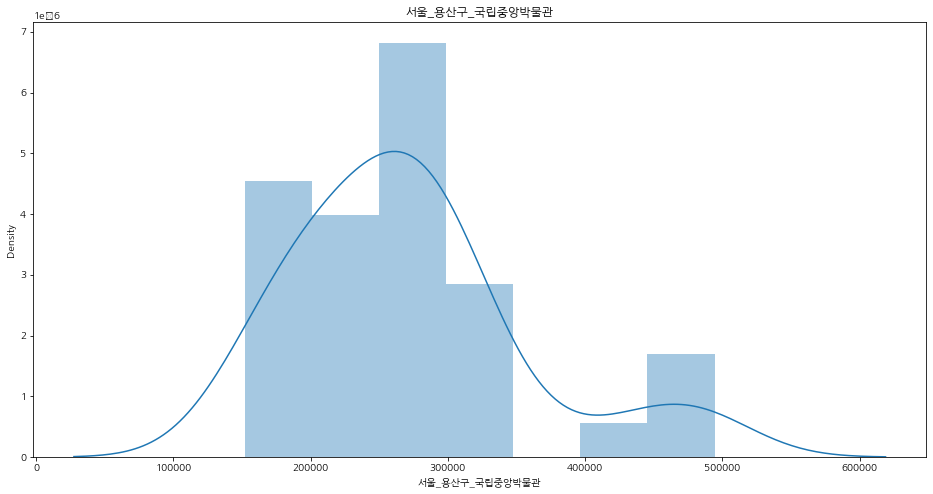

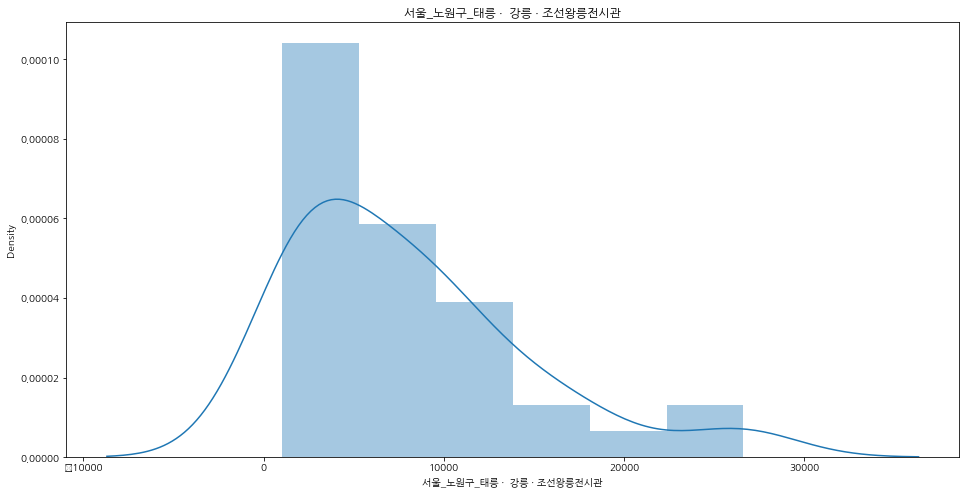

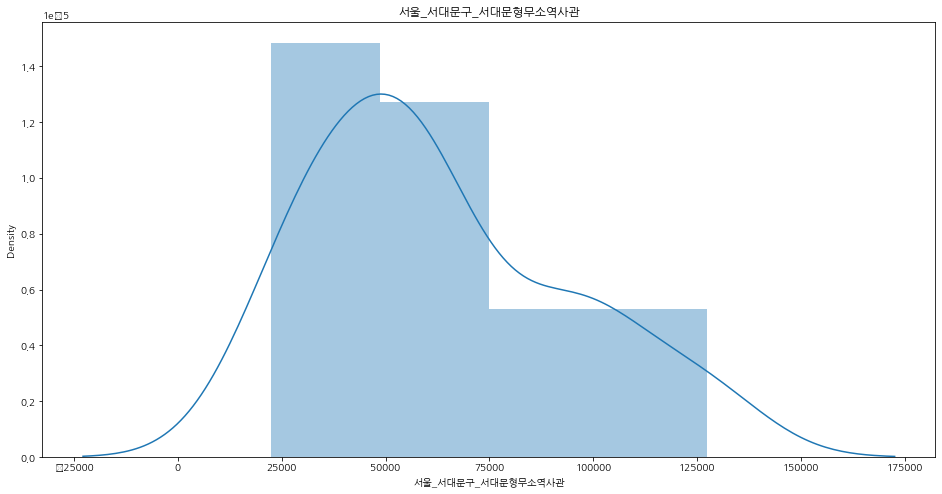

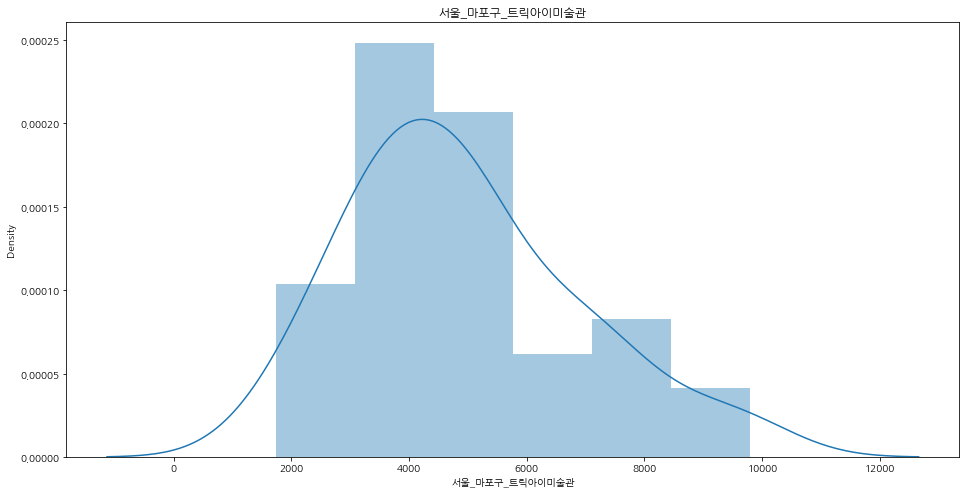

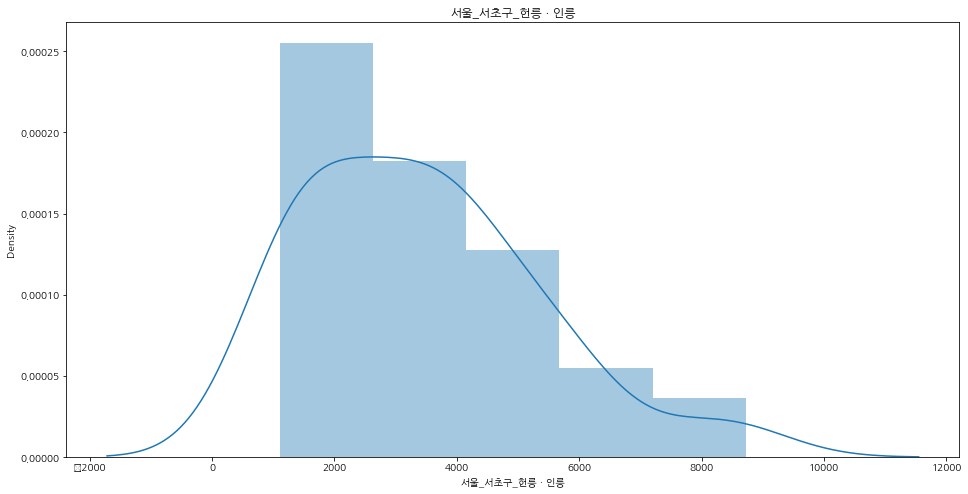

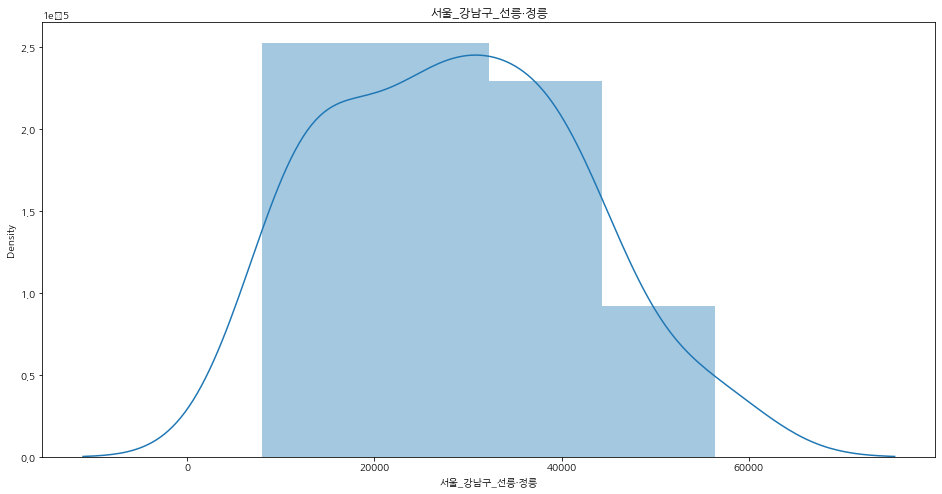

In [310]:
# target변수가 정규분포를 따르는지 확인해 보자.
# 몇 개의 target을 제외하고 정규분포를 따르는 것 같다.
for i in data.loc[:,'서울_종로구_경복궁':].columns:
  plt.figure(figsize = (16,8))
  sns.distplot(data[i])
  plt.title(f'{i}')
  plt.show()

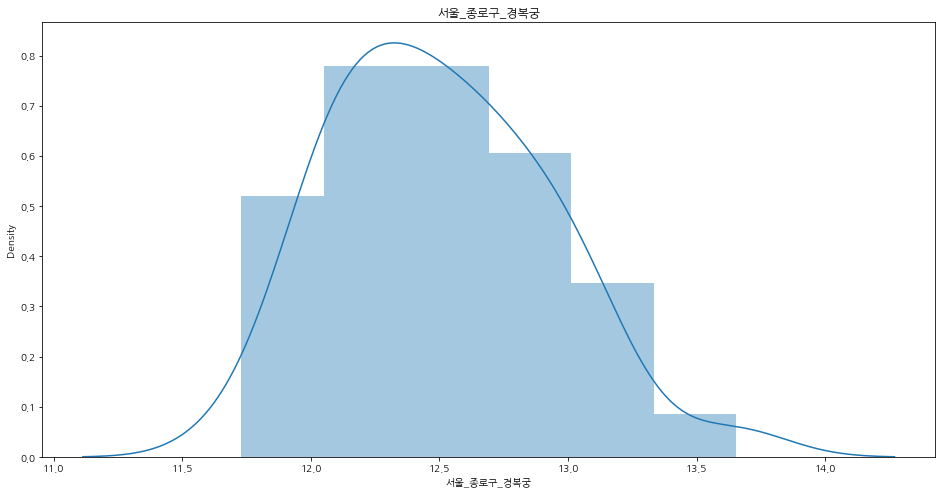

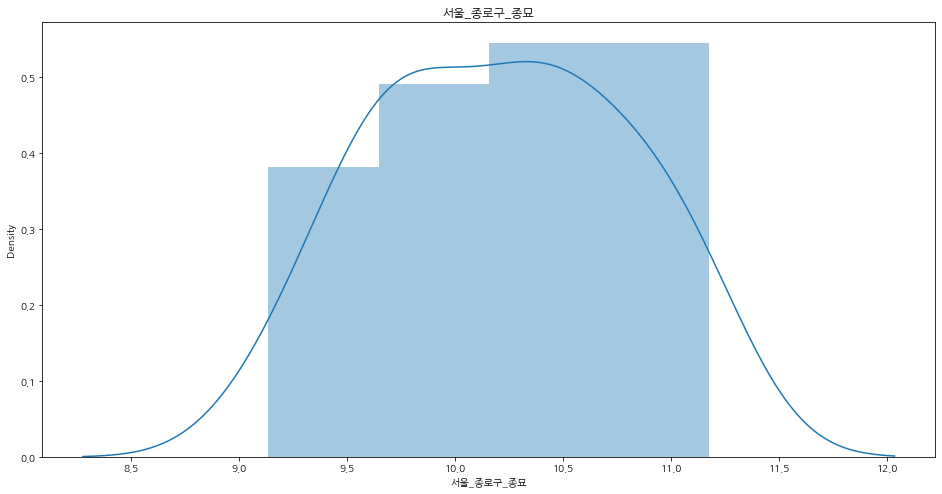

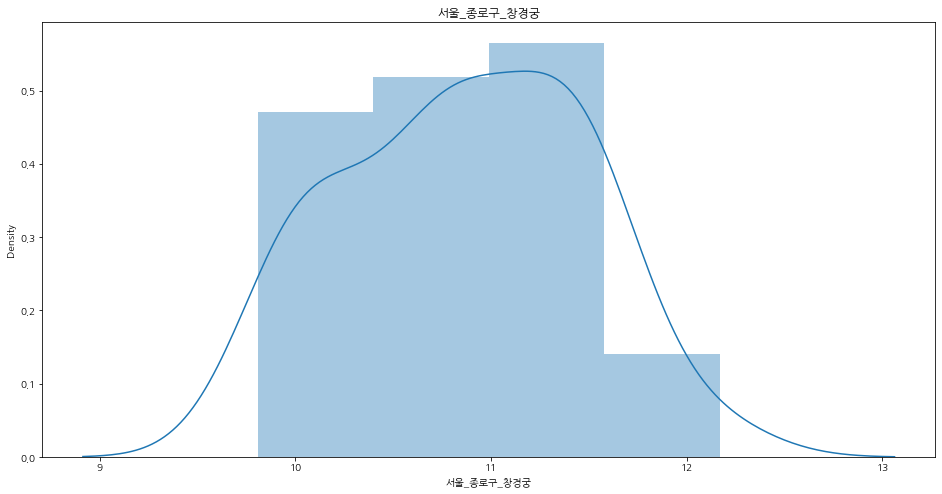

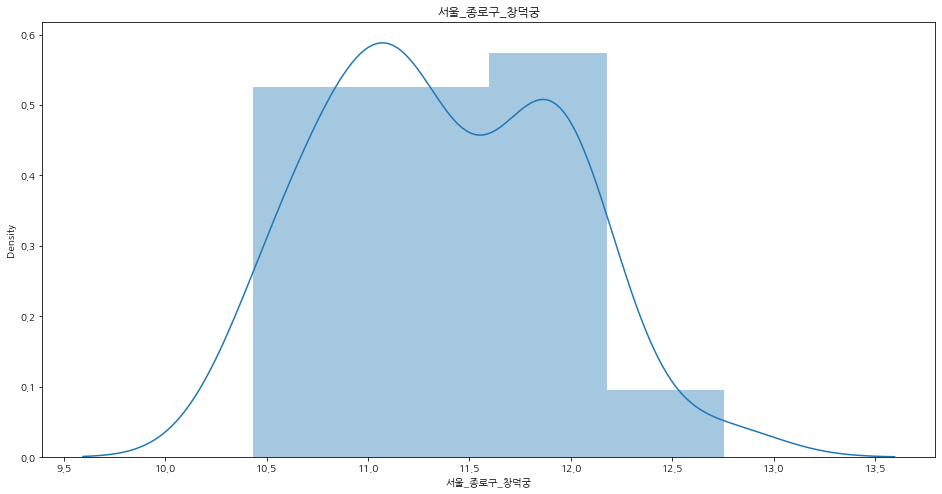

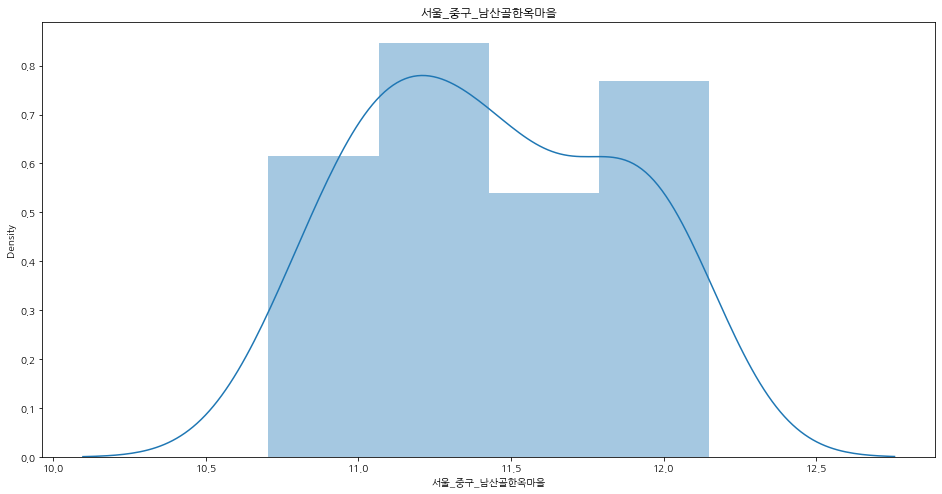

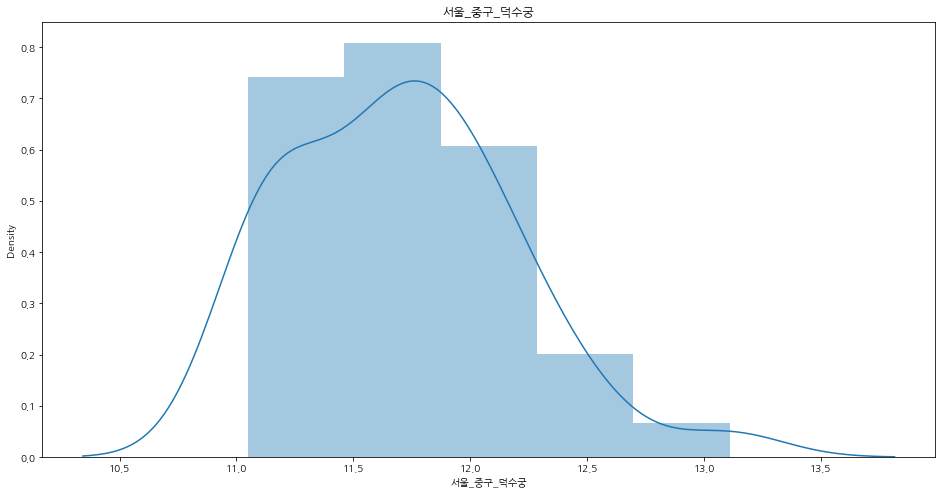

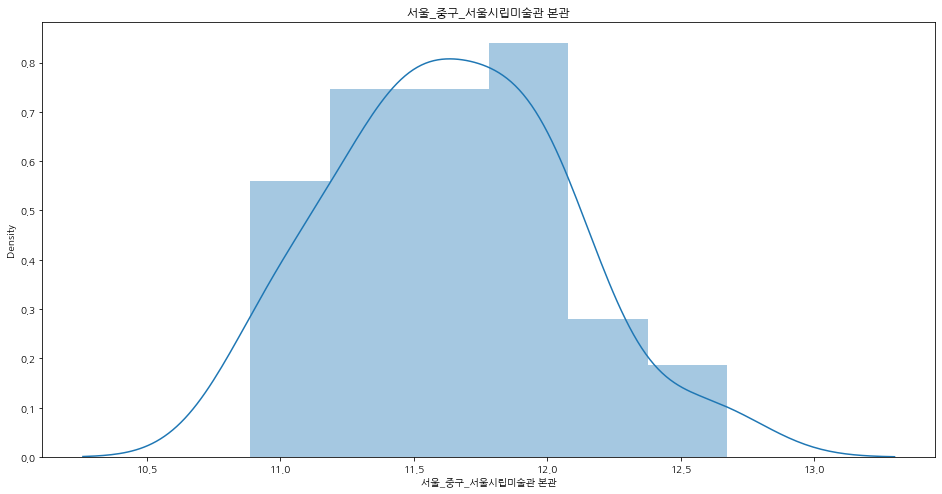

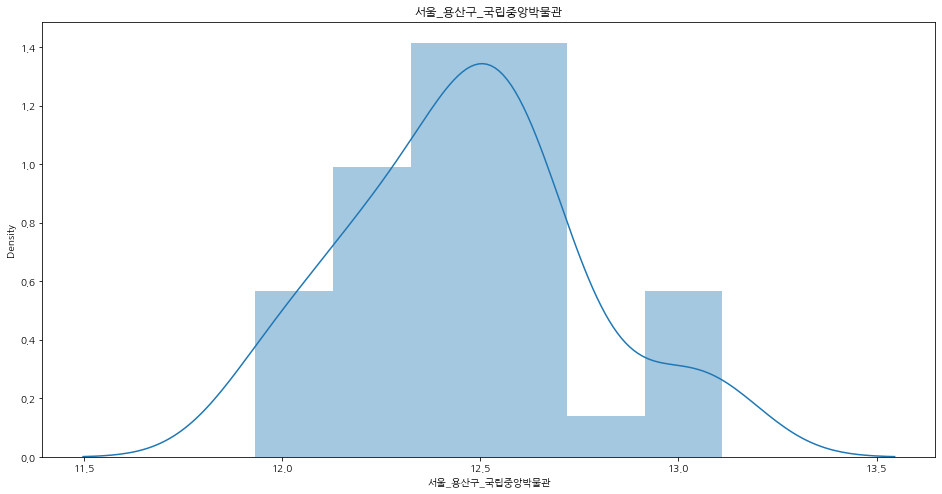

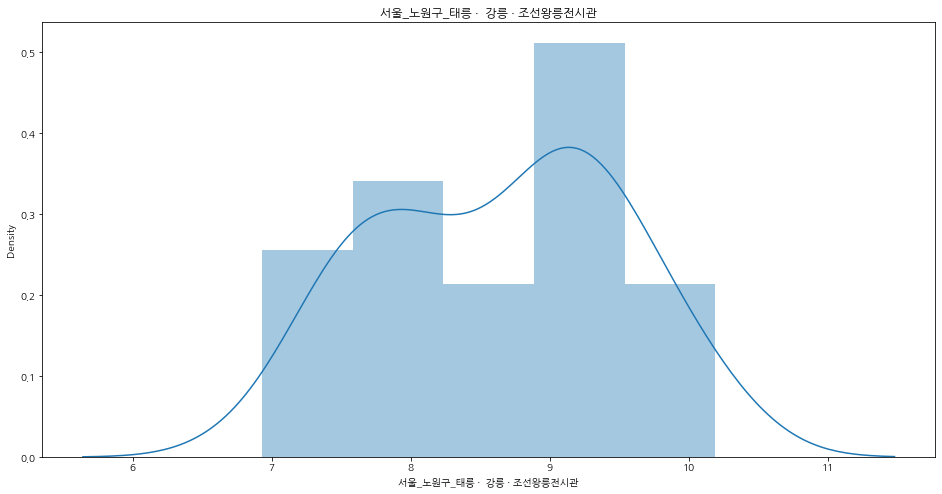

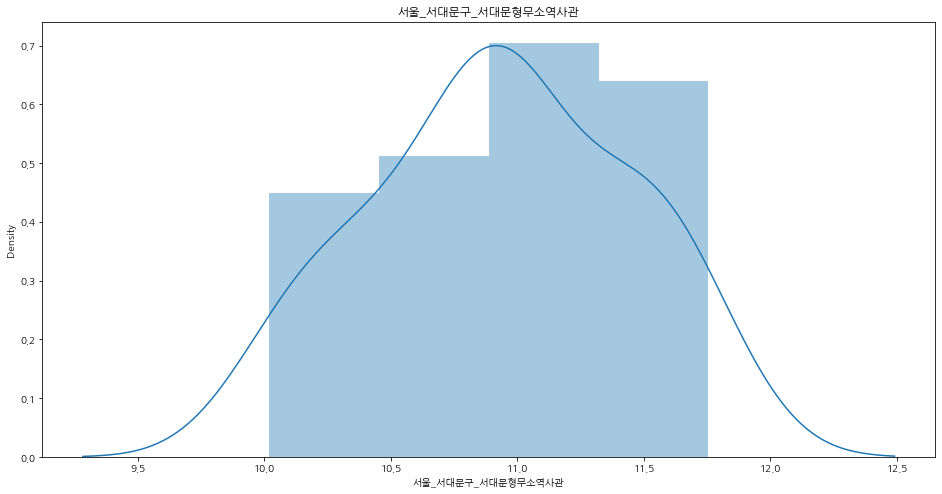

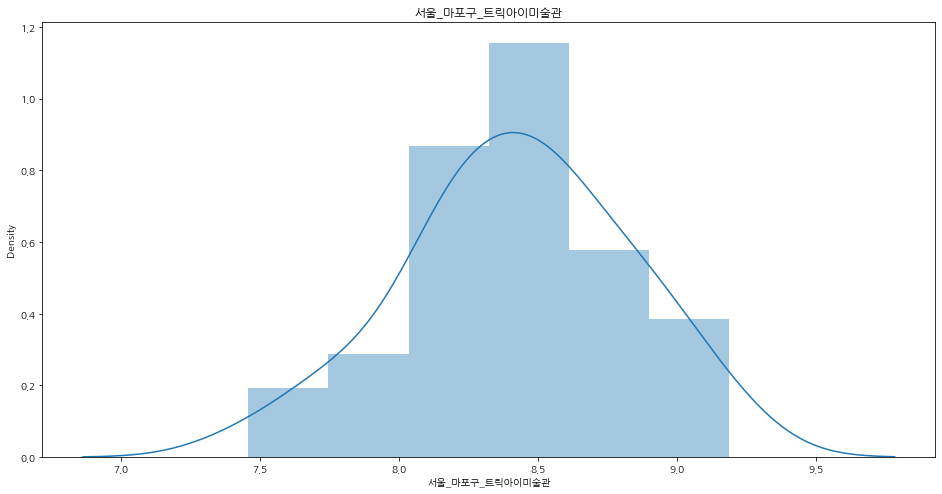

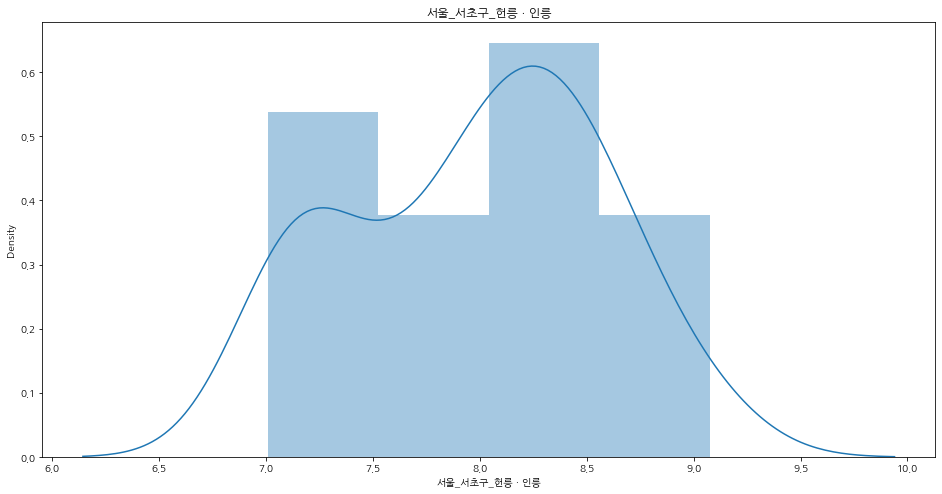

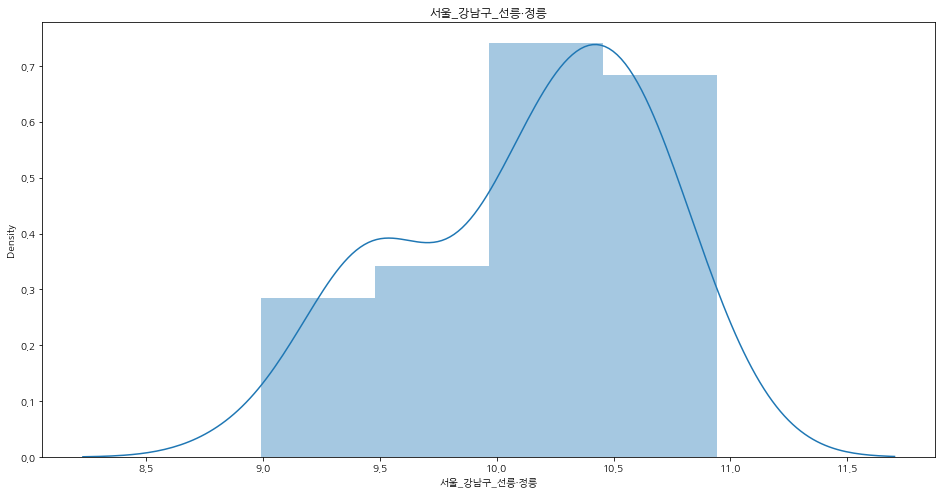

In [311]:
# log를 씌워줌으로써 target이 완전히 정규분포를 따르게 만들어보자.
for i in data.loc[:,'서울_종로구_경복궁':].columns:
  data[i] = data[i].apply(lambda x:np.log1p(x))

# log를 씌운 데이터를 가지고 그래프를 그려보자.
for i in data.loc[:,'서울_종로구_경복궁':].columns:
  plt.figure(figsize = (16,8))
  sns.distplot(data[i])
  plt.title(f'{i}')
  plt.show()


## 다른 feature들을 target변수와 비교해보기

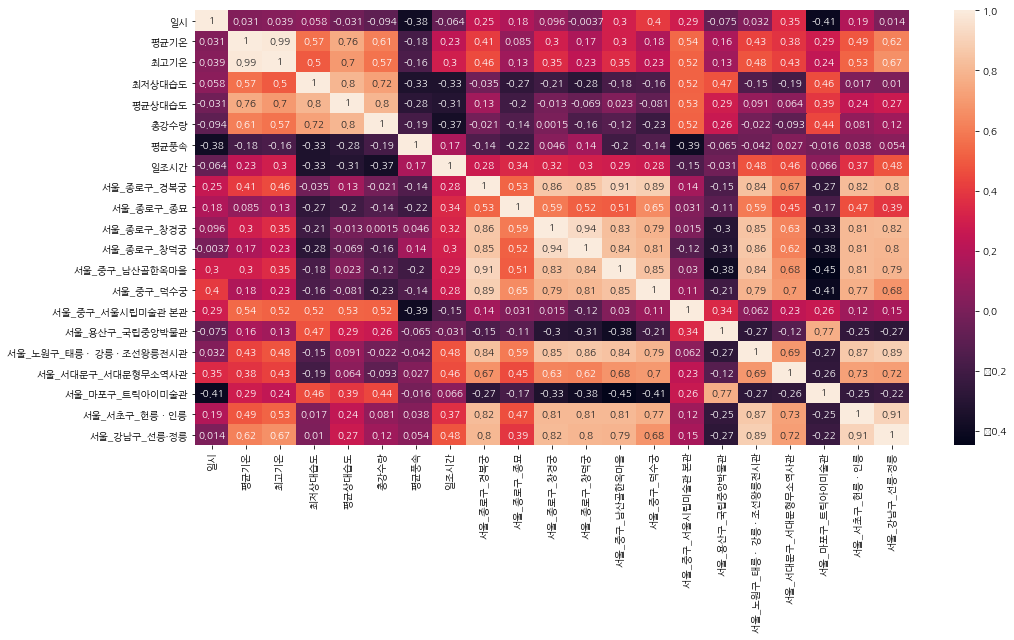

In [312]:
# 상관계수를 확인해 보면서 분석을 어떻게 진행할지 확인해 보자.
data_corr = data.corr()
plt.figure(figsize = (16,8))
sns.heatmap(data_corr, annot = True)

In [313]:
# 상관게수를 살펴보면 서울_마포구_트릭아이미술관과 서울_중구_서울시립미술관과 국립중앙박물관이 증가하고 나머지는 감소하는 것을 확인할 수 있다.
# 그리고 반대로 조선왕릉 전시관이 오르면 시립미술관과 국립중앙박물관이 조금 오르거나 아니면 내리는 경향이 있다.
# 그러면 실내와 실외로 구분해서 분석을 진행한다면 분석에 용이할 것이라고 확인된다.

# 1. 가정: 실내와 실외를 기준으로 feature의 중요도가 다를 것이라고 확인된다.
# 먼저 우리가 알고 있는 기온에 따른 관광지에 영향이 있는지 없는지를 확인해 보자.

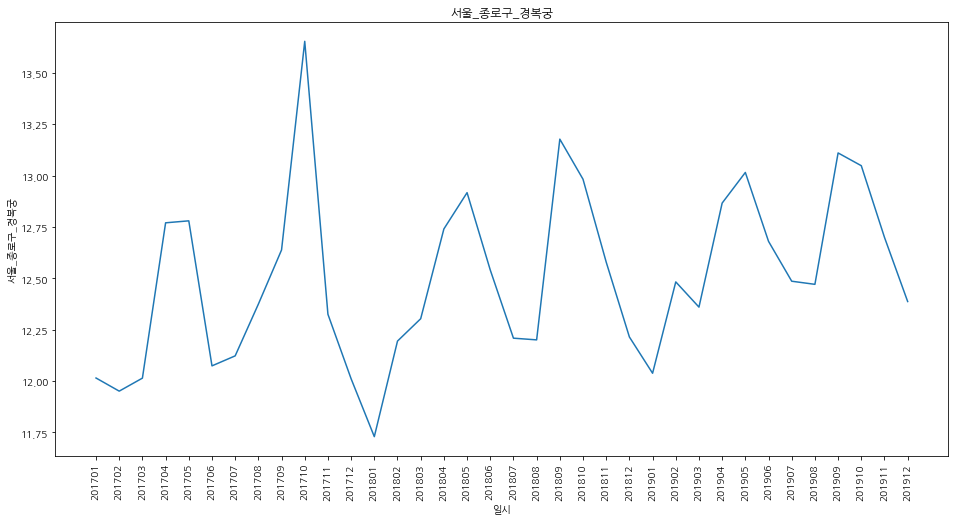

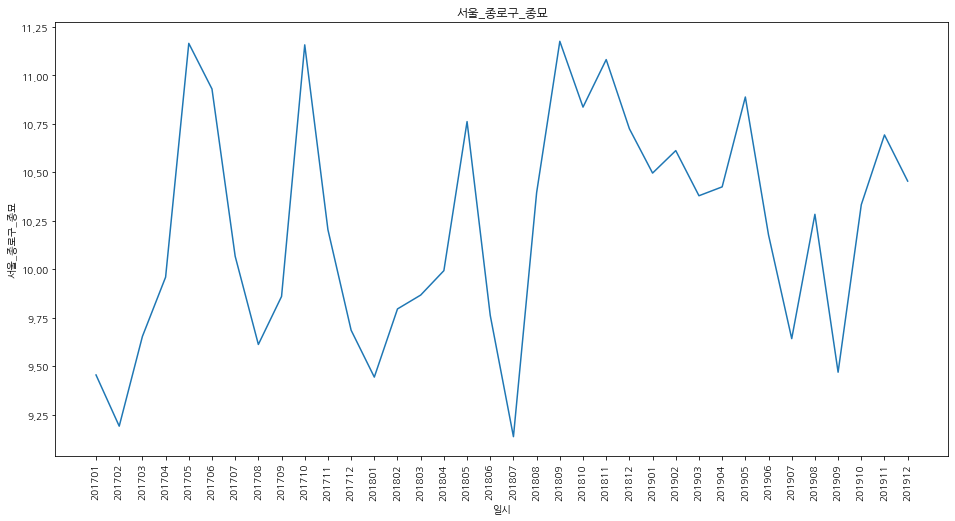

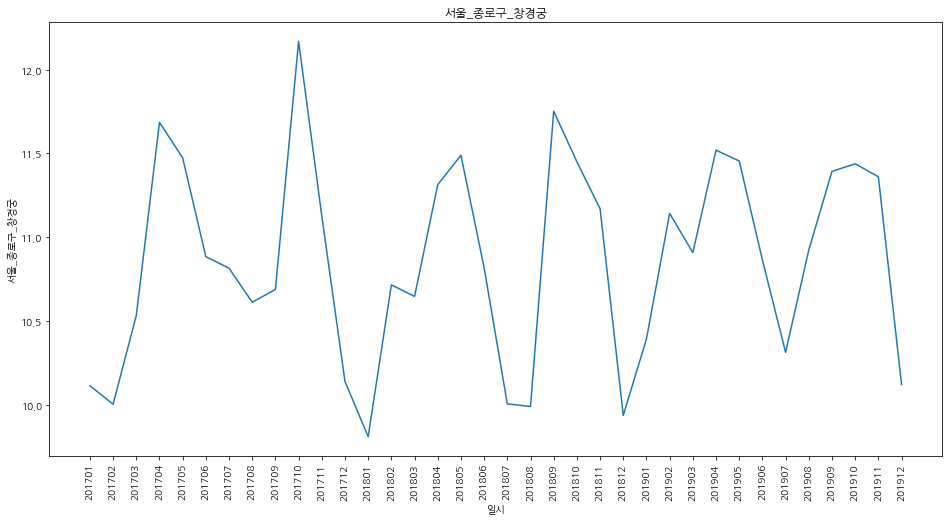

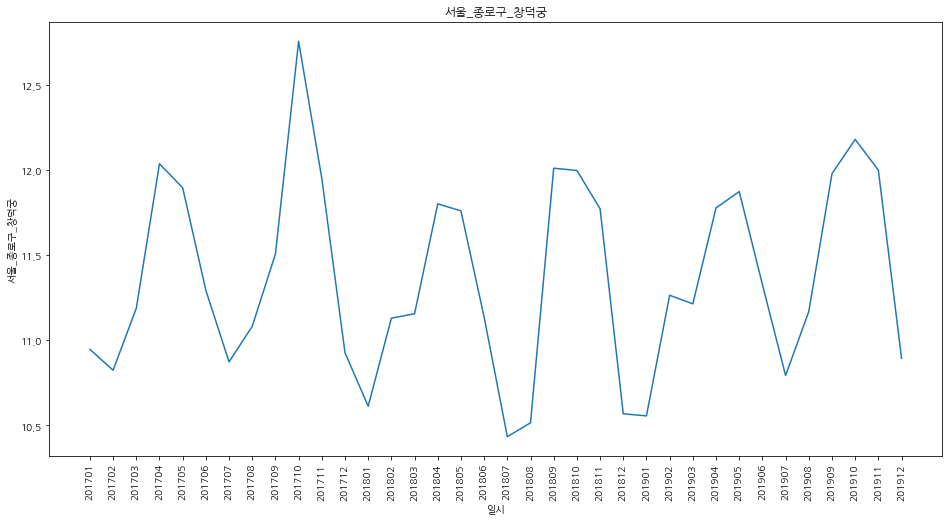

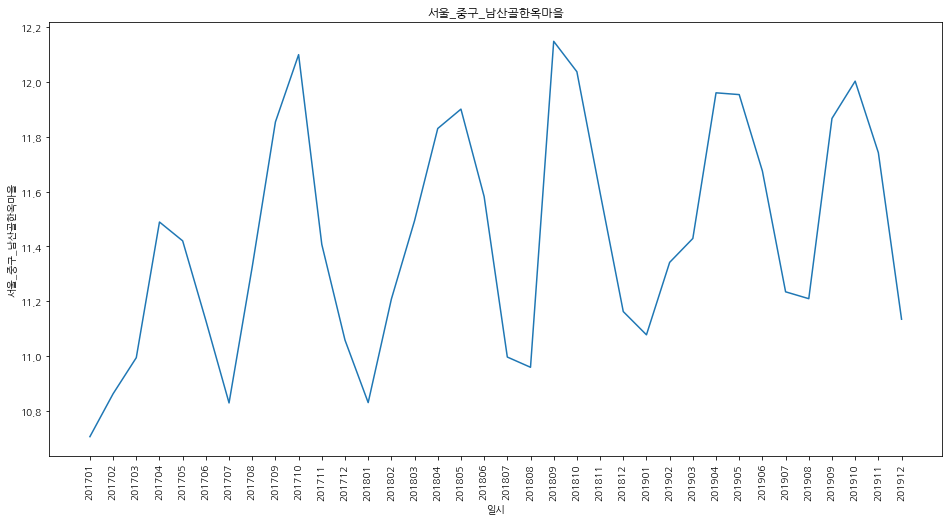

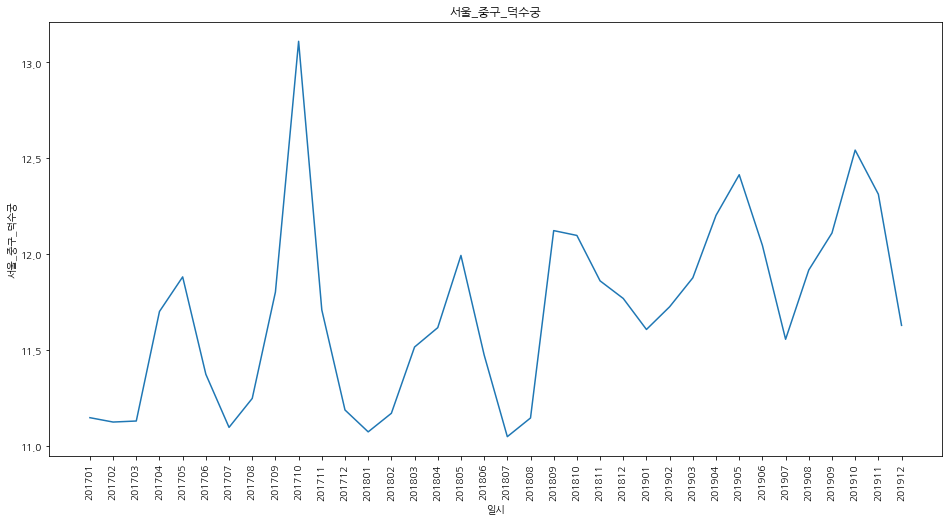

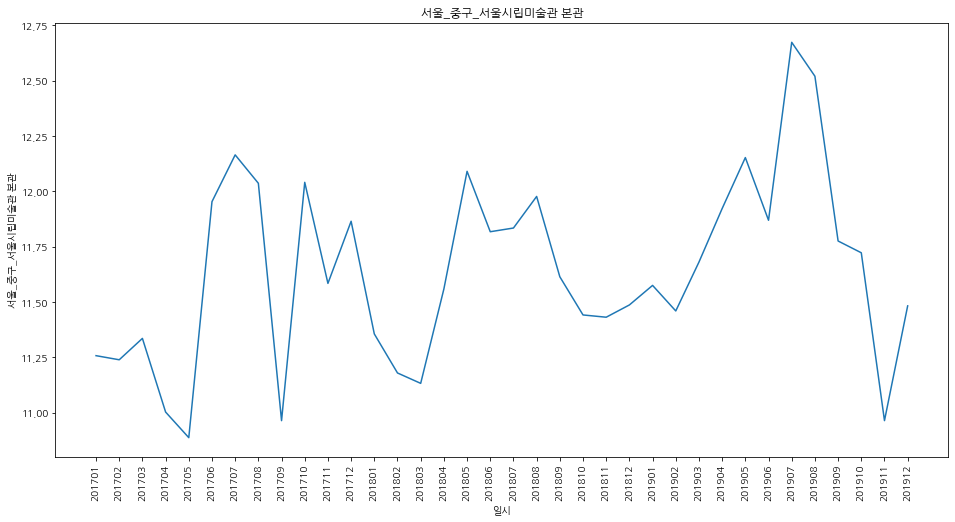

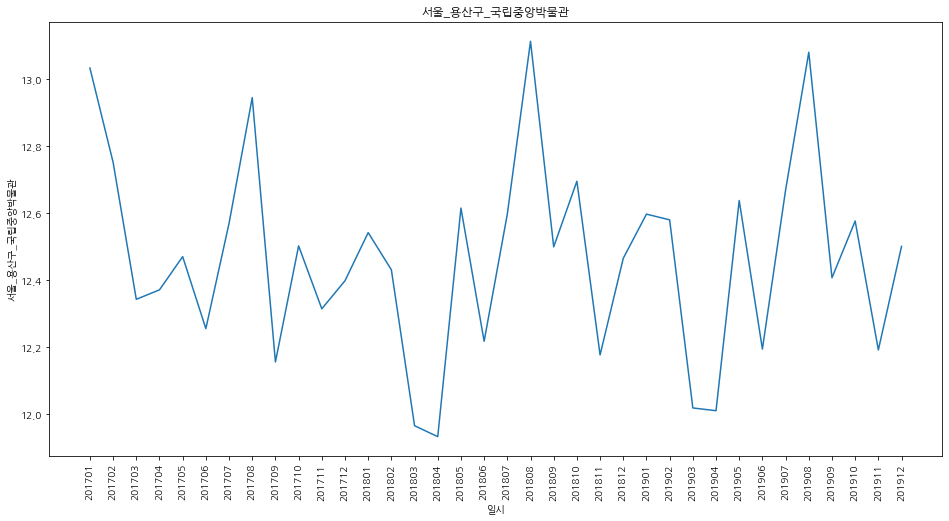

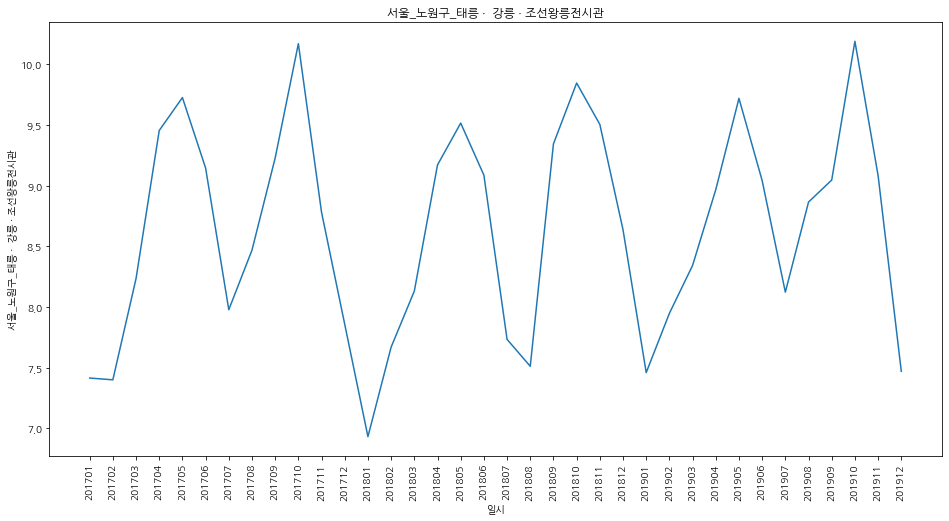

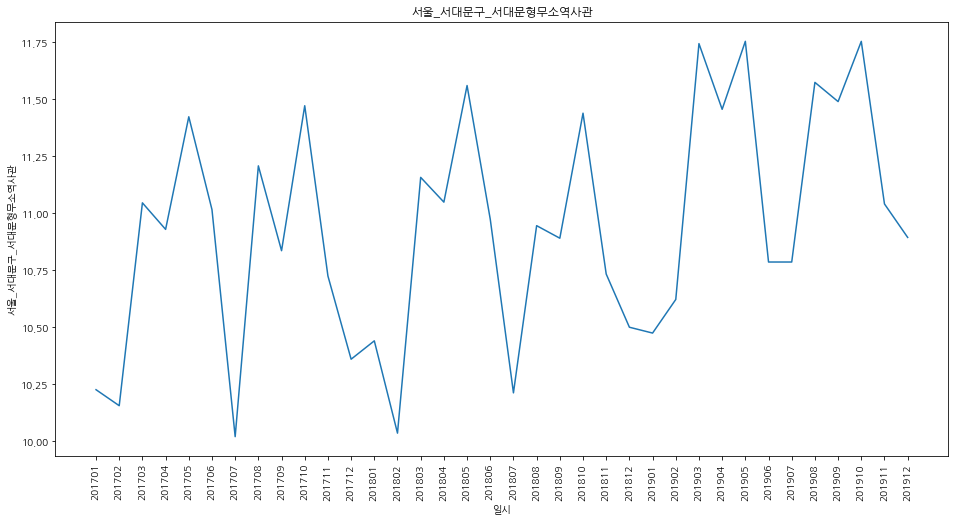

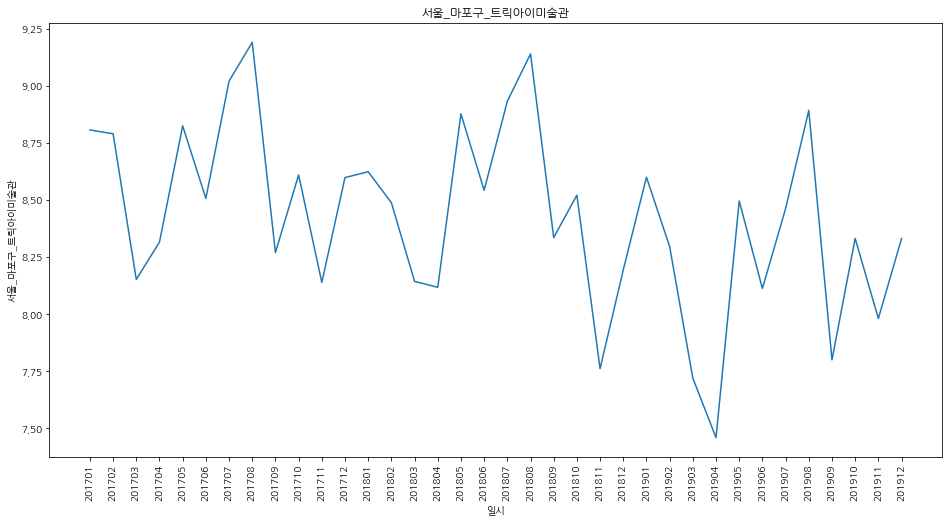

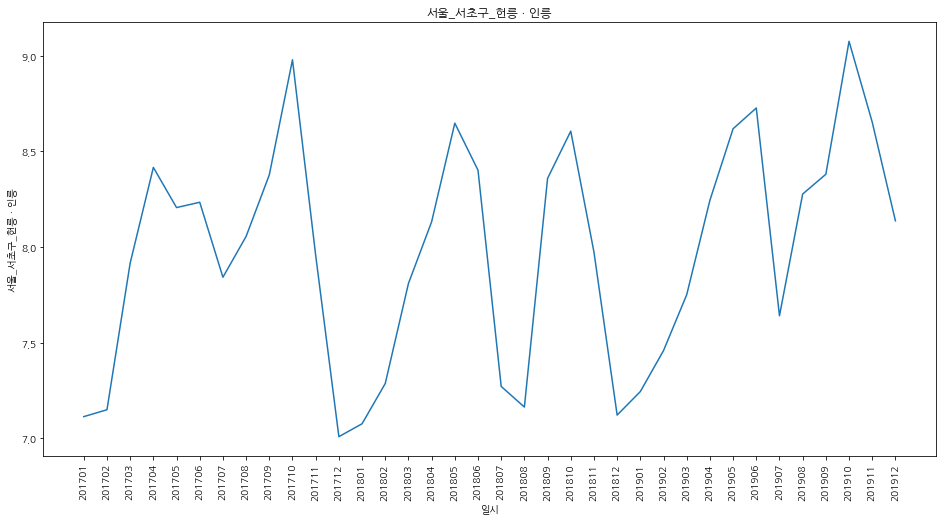

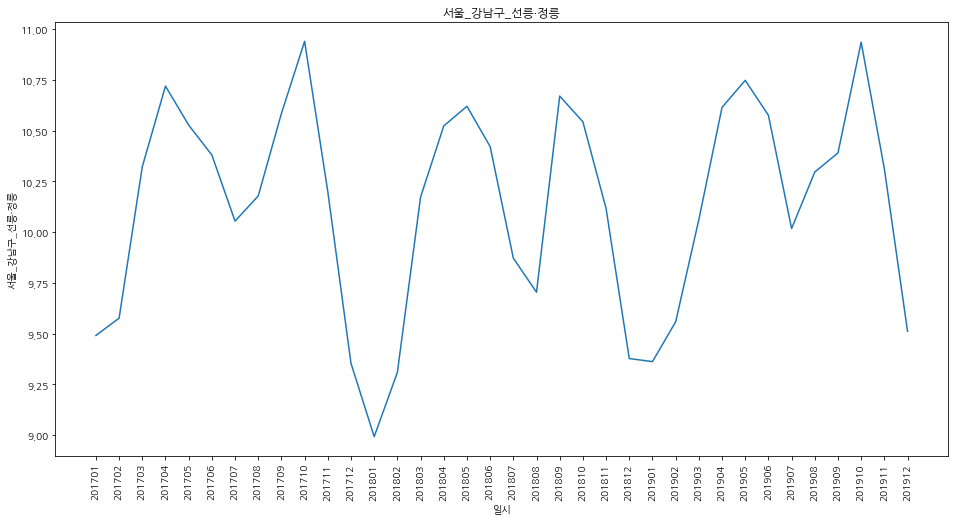

In [314]:
# lineplot 을 그려보도록 하자.
data['일시'] = data['일시'].astype('str')

# 실내와 실외의 차이가 심하고 관광지별로 주기성을 띄고 있다고 판단한다.\
for i in data.loc[:,'서울_종로구_경복궁':].columns:
  plt.figure(figsize = (16,8))
  sns.lineplot(data =data, x = '일시', y = i)
  plt.xticks(rotation=90)
  plt.title(f'{i}')
  plt.show()

# 년, 달, 계절의 변수 만들어주기.

In [315]:
def datetime(data):
  data['year'] = data['일시'].apply(lambda x: x[:4])
  data['month'] = data['일시'].apply(lambda x: x[4:])
  for i in data.index:
    if data.loc[i,'month'] in ['02','12','01']:
      data.loc[i,'weather'] = '겨울'
    elif data.loc[i,'month'] in ['03','04','05']:
      data.loc[i,'weather'] = '봄'
    elif data.loc[i,'month'] in ['06','07','08']:
      data.loc[i,'weather'] = '여름'
    else:
      data.loc[i,'weather'] = '가을'
  return data

data = datetime(data)

# 서울_종로구_경복궁

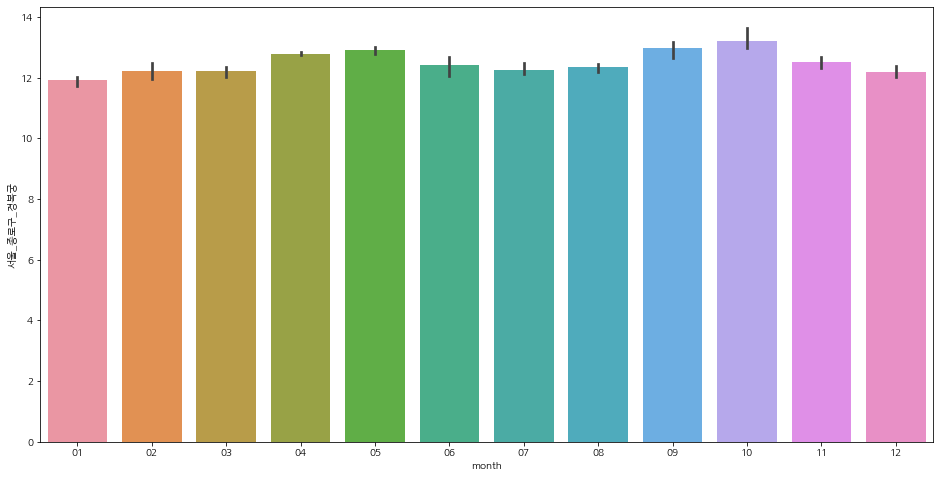

In [316]:
# 월별로 차이가 있는지 확인해보자.
plt.figure(figsize = (16,8))
sns.barplot(data = data, x = 'month', y = '서울_종로구_경복궁')

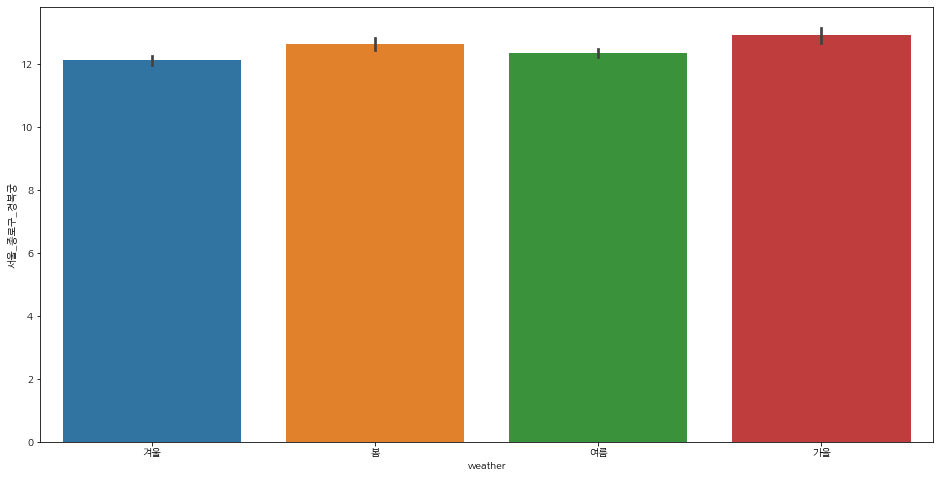

In [317]:
# 계절별로 차이가 있는지 확인해보자.
plt.figure(figsize = (16,8))
sns.barplot(data = data, x = 'weather', y = '서울_종로구_경복궁')

# 가을과 봄에 가장 많은 관광객이 방문하고 추운 겨울날에는 가장 적은 관광객이 온다.

# 기온에 관하여 EDA 해보기

Text(0.5, 1.0, '평균기온의 boxenplot')

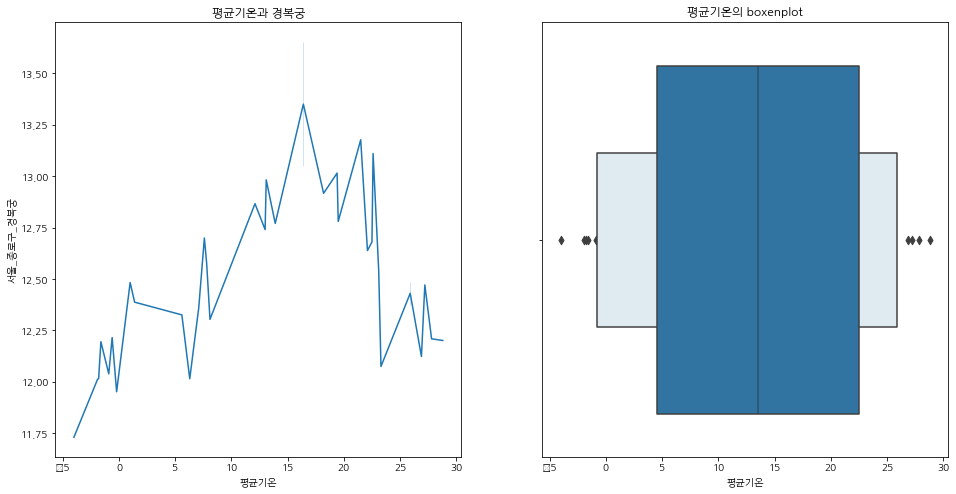

In [318]:
# 평균기온
# 봄과 가을의 날씨에 관광객이 많아지고 추운 겨울이나 여름에는 관광객의 수가 줄어드는 경향이 있다.
fig, ax  = plt.subplots(ncols = 2, figsize = (16,8))
sns.lineplot(data = data, x  = '평균기온', y = '서울_종로구_경복궁', ax = ax[0])
sns.boxenplot(data['평균기온'], ax = ax[1])
ax[0].set_title('평균기온과 경복궁')
ax[1].set_title('평균기온의 boxenplot')

Text(0.5, 1.0, '최고기온의 boxenplot')

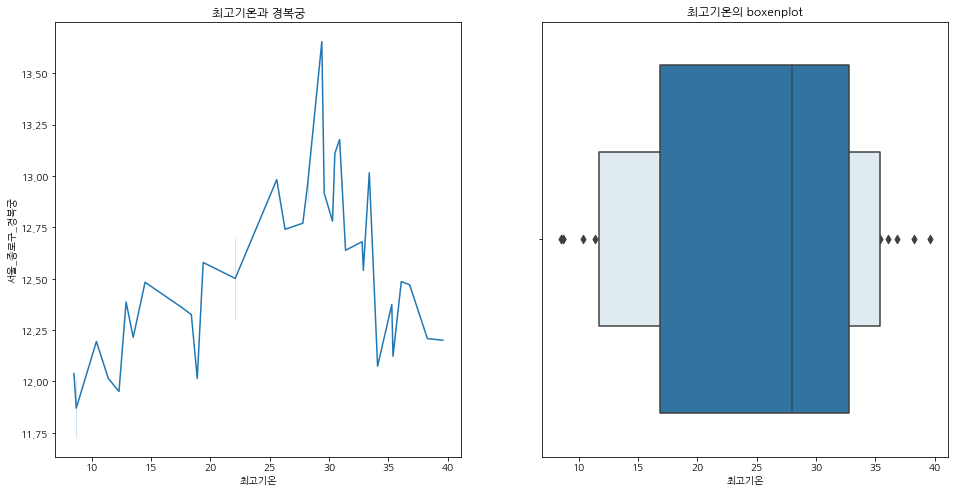

In [319]:
# 최고기온
# 최고기온의 경우 25~30에 가장 많은 관광객이 방문하는 것으로 보인다. 그리고 겨울이나 완전 여름인 날씨에는 다시 줄어드는 경향이 있다.
fig, ax  = plt.subplots(ncols = 2, figsize = (16,8))
sns.lineplot(data = data, x  = '최고기온', y = '서울_종로구_경복궁', ax = ax[0])
sns.boxenplot(data['최고기온'], ax = ax[1])
ax[0].set_title('최고기온과 경복궁')
ax[1].set_title('최고기온의 boxenplot')

# 습도에 관한 EDA

Text(0.5, 1.0, '최저상대습도 boxenplot')

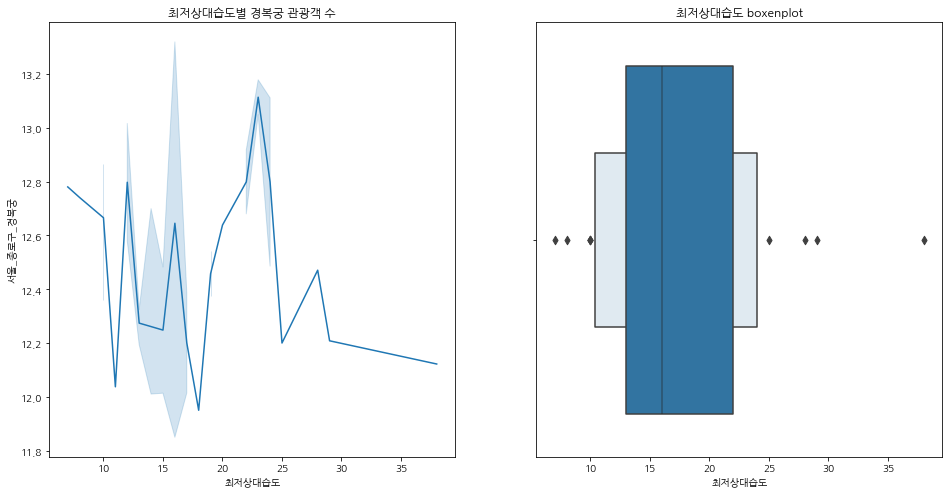

In [320]:
# 최저상대습도로 관광객 수 확인해보기
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.lineplot(data = data, x = '최저상대습도', y = '서울_종로구_경복궁', ax = ax[0])
sns.boxenplot(data['최저상대습도'], ax = ax[1])
ax[0].set_title('최저상대습도별 경복궁 관광객 수')
ax[1].set_title('최저상대습도 boxenplot')

Text(0.5, 1.0, '평균상대습도 boxenplot')

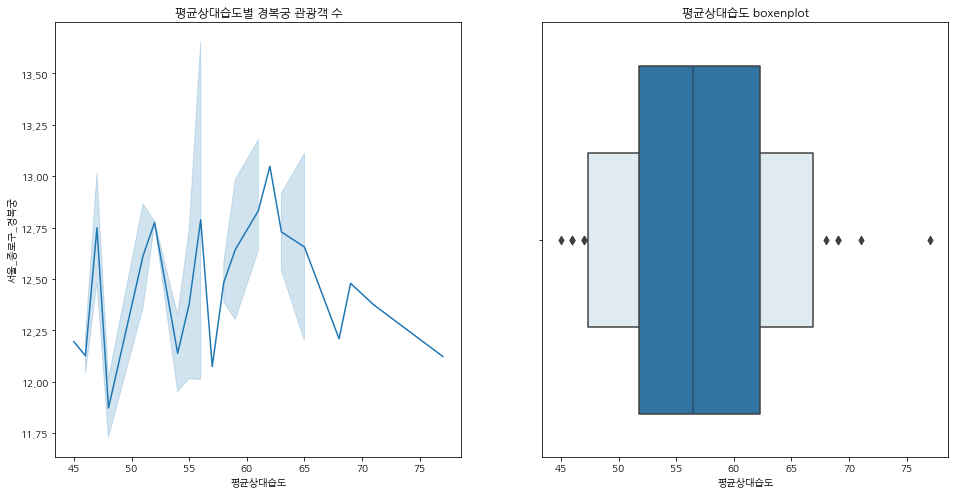

In [321]:
# 평균상대습도로 관광객 수 확인해보기
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.lineplot(data = data, x = '평균상대습도', y = '서울_종로구_경복궁', ax = ax[0])
sns.boxenplot(data['평균상대습도'], ax = ax[1])
ax[0].set_title('평균상대습도별 경복궁 관광객 수')
ax[1].set_title('평균상대습도 boxenplot')

# 강수량에 관한 EDA

Text(0.5, 1.0, '총강수량 boxenplot')

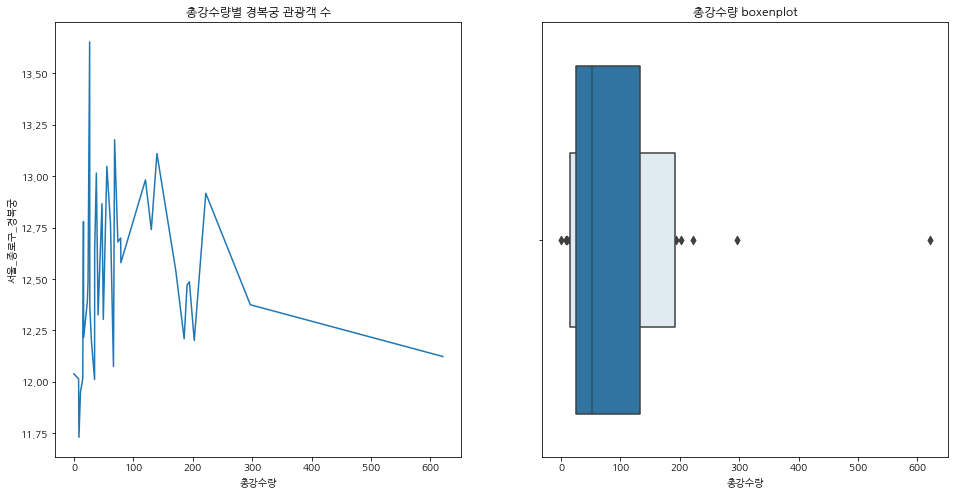

In [322]:
# 강수량이랑 관광객 수 확인해보기
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.lineplot(data = data, x = '총강수량', y = '서울_종로구_경복궁', ax = ax[0])
sns.boxenplot(data['총강수량'], ax = ax[1])
ax[0].set_title('총강수량별 경복궁 관광객 수')
ax[1].set_title('총강수량 boxenplot')

# 평균풍속

Text(0.5, 1.0, '평균풍속 boxenplot')

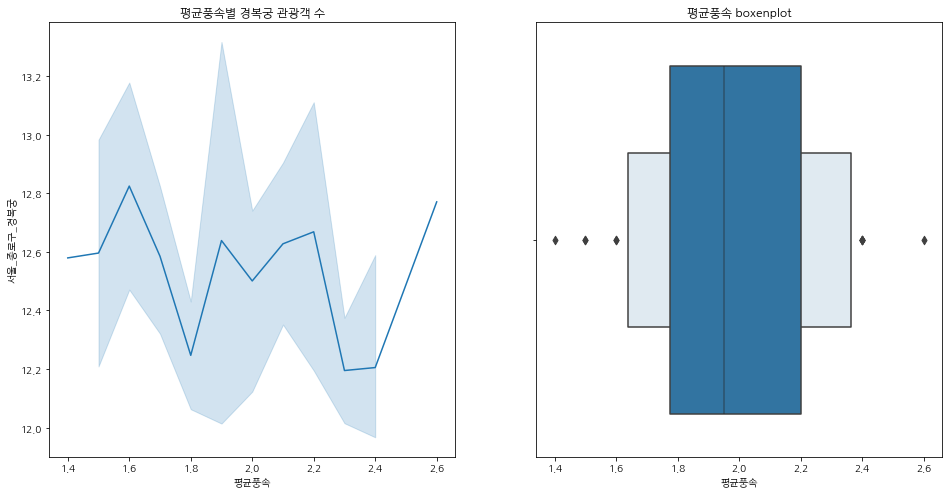

In [323]:
# 평균풍속과 관광객 수 확인해보기
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.lineplot(data = data, x = '평균풍속', y = '서울_종로구_경복궁', ax = ax[0])
sns.boxenplot(data['평균풍속'], ax = ax[1])
ax[0].set_title('평균풍속별 경복궁 관광객 수')
ax[1].set_title('평균풍속 boxenplot')

# 일조시간

Text(0.5, 1.0, '일조시간 boxenplot')

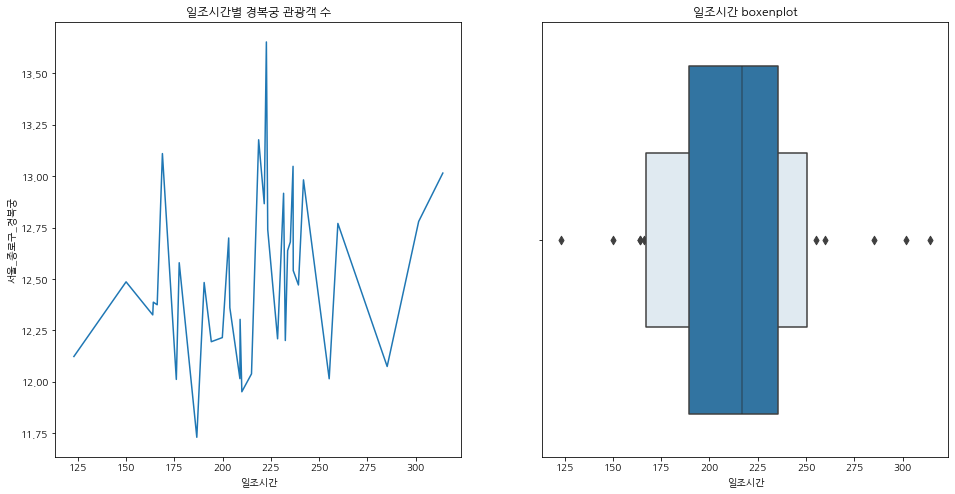

In [324]:
# 일조시간과 관광객 수 확인해보기
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.lineplot(data = data, x = '일조시간', y = '서울_종로구_경복궁', ax = ax[0])
sns.boxenplot(data['일조시간'], ax = ax[1])
ax[0].set_title('일조시간별 경복궁 관광객 수')
ax[1].set_title('일조시간 boxenplot')

# Statsmodel

In [325]:
data.columns

Index(['일시', '평균기온', '최고기온', '최저상대습도', '평균상대습도', '총강수량', '평균풍속', '일조시간',
       '서울_종로구_경복궁', '서울_종로구_종묘', '서울_종로구_창경궁', '서울_종로구_창덕궁', '서울_중구_남산골한옥마을',
       '서울_중구_덕수궁', '서울_중구_서울시립미술관 본관', '서울_용산구_국립중앙박물관',
       '서울_노원구_태릉 ·  강릉 · 조선왕릉전시관', '서울_서대문구_서대문형무소역사관', '서울_마포구_트릭아이미술관',
       '서울_서초구_헌릉ㆍ인릉', '서울_강남구_선릉·정릉', 'year', 'month', 'weather'],
      dtype='object')

In [326]:
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
data['weather'] = label.fit_transform(data['weather'])

for i in ['year','month']:
  data[i] = data[i].astype('int')

X = sm.add_constant(data[['평균기온','최고기온','최저상대습도','평균상대습도','총강수량','평균풍속','일조시간','year','month','weather']])
y = data['서울_종로구_경복궁']

model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             서울_종로구_경복궁   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     7.613
Date:                Mon, 05 Jul 2021   Prob (F-statistic):           1.91e-05
Time:                        03:07:19   Log-Likelihood:                 5.7798
No. Observations:                  36   AIC:                             10.44
Df Residuals:                      25   BIC:                             27.86
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -228.4187    119.661     -1.909      0.0

# Modeling

In [327]:
!pip install catboost

In [328]:
data['일시'] = data['일시'].astype('int')
train = data[data['일시'] <= 201812]
test = data[data['일시'] > 201812]

X_train, y_train = train[['평균기온','최고기온','최저상대습도','평균상대습도','총강수량','평균풍속','일조시간','year','month','weather']], train['서울_종로구_경복궁']
X_test, y_test = test[['평균기온','최고기온','최저상대습도','평균상대습도','총강수량','평균풍속','일조시간','year','month','weather']], test['서울_종로구_경복궁']

X_train = pd.get_dummies(X_train, columns = ['weather'])
X_test = pd.get_dummies(X_test, columns = ['weather'])

In [329]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
models = {'lightgbm':LGBMRegressor(), 'xgboost':XGBRegressor(),'catboost': CatBoostRegressor(),'lr': LinearRegression(),'ridge': Ridge(),'lasso': Lasso()}
model_rmse = {}
for i,j in models.items():
  model = j
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  y_pred = np.exp(y_pred) - 1
  model_test = y_test.copy()
  model_test = np.exp(model_test)-1
  RMSE = mean_squared_error(model_test, y_pred) ** 0.5

  model_rmse[i] = RMSE

# 가장 좋은 성능을 내는 모델 찾아서 맞추기
print(sorted(model_rmse.items(), key = lambda item:item[1]))

[03:07:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Learning rate set to 0.020095
0:	learn: 0.4390688	total: 473us	remaining: 473ms
1:	learn: 0.4363914	total: 1.22ms	remaining: 607ms
2:	learn: 0.4334996	total: 1.86ms	remaining: 619ms
3:	learn: 0.4309354	total: 2.53ms	remaining: 629ms
4:	learn: 0.4289486	total: 3.13ms	remaining: 622ms
5:	learn: 0.4263567	total: 3.72ms	remaining: 616ms
6:	learn: 0.4233022	total: 4.33ms	remaining: 615ms
7:	learn: 0.4206629	total: 4.91ms	remaining: 609ms
8:	learn: 0.4171088	total: 5.44ms	remaining: 599ms
9:	learn: 0.4143697	total: 6.05ms	remaining: 599ms
10:	learn: 0.4103884	total: 6.68ms	remaining: 601ms
11:	learn: 0.4078970	total: 7.29ms	remaining: 600ms
12:	learn: 0.4054231	total: 7.87ms	remaining: 597ms
13:	learn: 0.4029068	total: 8.51ms	remaining: 599ms
14:	learn: 0.4008262	total: 9.13ms	remaining: 600ms
15:	learn: 0.3982413	total: 9.6ms	remaining: 590ms
16:	learn: 0.3949717	to

# 불쾌지수, 여름철 체감온도, 겨울철 체감온도 feature 만들어주기

In [344]:
class final_dataframe:
  # 여름철 체감온도
  def summer_feature(df = None):
    H = df['평균상대습도']
    T = df['평균기온']

    temperature = -42.379 + (2.04901523*T) + (10.14333127 * H ) - (0.22475541 * T * H) - (0.00683783 * (T ** 2)) - (0.05481717 * (H**2)) + (0.00122874 * (T**2) * H ) + (0.00085282 *  T * (H ** 2)) - (0.00000199 * (T **2) * (H ** 2))
    df['여름철 체감온도'] = temperature

    return df

  # 겨울철 체감온도
  def winter_feature(df = None):
    T = df['평균기온']
    V = df['평균풍속']

    temperature = 13.12 + (0.6215 * T) - (11.37 * 0.16 * V) + (0.3965 *V *0.16 *T)

    df['겨울철 체감온도'] = temperature
    return df

  # 불쾌지수 구하기
  def 불쾌지수(df = None):
    T = df['평균기온']
    H = df['평균상대습도']
    
    불쾌지수 = (9/5 * T) - (0.55 * (1 - H/100) * ((9/5 * T) - 26)) + 32

    df['불쾌지수'] = 불쾌지수

    return df

  def final_dataframe(df = None):
    df1=final_dataframe.summer_feature(df = df)
    df2=final_dataframe.winter_feature(df = df1)
    df3=final_dataframe.불쾌지수(df = df2)
    return df3

X_train = final_dataframe.final_dataframe(X_train)
X_test = final_dataframe.final_dataframe(X_test)

In [345]:
X_train.head()

,평균기온,최고기온,최저상대습도,평균상대습도,총강수량,평균풍속,일조시간,year,month,weather_0,weather_1,weather_2,weather_3,여름철 체감온도,겨울철 체감온도,불쾌지수
0,-1.8,11.4,17,55,14.9,2.3,209.0,2017,1,0,1,0,0,363.778537,7.554498,35.99690
1,-0.2,12.3,18,54,11.1,2.4,210.0,2017,2,0,1,0,0,347.036360,8.599169,38.30908
2,6.3,18.9,15,48,7.9,2.4,255.2,2017,3,0,0,1,0,277.411281,13.628583,47.53276
3,13.9,27.8,10,52,61.6,2.6,259.7,2017,4,0,0,1,0,244.914711,19.321652,57.27872
4,19.5,30.3,7,52,16.1,2.4,301.5,2017,5,0,0,1,0,213.519584,23.842162,64.69760


In [346]:
X_test.head()

,평균기온,최고기온,최저상대습도,평균상대습도,총강수량,평균풍속,일조시간,year,month,weather_0,weather_1,weather_2,weather_3,여름철 체감온도,겨울철 체감온도,불쾌지수
24,-0.9,8.5,11,46,0.0,1.8,215.0,2019,1,0,1,0,0,314.094590,9.183317,38.58314
25,1.0,14.5,15,47,23.8,1.8,190.5,2019,2,0,1,0,0,306.682349,10.581132,40.85430
26,7.1,17.6,10,51,26.8,2.1,203.8,2019,3,0,0,1,0,283.817985,14.658220,48.34279
27,12.1,28.2,10,51,47.3,1.9,221.6,2019,4,0,0,1,0,252.703940,18.642156,54.91729
28,19.4,33.4,12,47,37.8,2.1,314.0,2019,5,0,0,1,0,202.139767,23.941326,64.31982


In [347]:
# 여름철 체감온도, 겨울철 체감온도, 불쾌지수를 넣었을 때 statsmodels
X = X_train
y = y_train

model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             서울_종로구_경복궁   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     7.013
Date:                Mon, 05 Jul 2021   Prob (F-statistic):            0.00454
Time:                        03:38:26   Log-Likelihood:                 17.300
No. Observations:                  24   AIC:                            -2.600
Df Residuals:                       8   BIC:                             16.25
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
평균기온           1.2699      0.439      2.890      0.0

In [348]:
# 최고 성능의 모델의 경우 62912.313082469846 까지 내려갔다.
models = {'lightgbm':LGBMRegressor(), 'xgboost':XGBRegressor(),'catboost': CatBoostRegressor(),'lr': LinearRegression(),'ridge': Ridge(),'lasso': Lasso()}
model_rmse = {}
for i,j in models.items():
  model = j
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  y_pred = np.exp(y_pred) - 1
  model_test = y_test.copy()
  model_test = np.exp(model_test)-1
  RMSE = mean_squared_error(model_test, y_pred) ** 0.5

  model_rmse[i] = RMSE

# 가장 좋은 성능을 내는 모델 찾아서 맞추기
print(sorted(model_rmse.items(), key = lambda item:item[1]))

[03:39:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Learning rate set to 0.020095
0:	learn: 0.4382057	total: 395us	remaining: 395ms
1:	learn: 0.4349681	total: 986us	remaining: 492ms
2:	learn: 0.4319036	total: 1.47ms	remaining: 490ms
3:	learn: 0.4285557	total: 2.25ms	remaining: 559ms
4:	learn: 0.4254167	total: 2.63ms	remaining: 524ms
5:	learn: 0.4215099	total: 3.07ms	remaining: 509ms
6:	learn: 0.4187678	total: 3.77ms	remaining: 535ms
7:	learn: 0.4158826	total: 4.29ms	remaining: 532ms
8:	learn: 0.4130286	total: 4.93ms	remaining: 543ms
9:	learn: 0.4100702	total: 5.62ms	remaining: 557ms
10:	learn: 0.4070077	total: 6.08ms	remaining: 546ms
11:	learn: 0.4046522	total: 6.77ms	remaining: 557ms
12:	learn: 0.4025846	total: 7.46ms	remaining: 566ms
13:	learn: 0.3999605	total: 8.16ms	remaining: 575ms
14:	learn: 0.3970489	total: 8.85ms	remaining: 581ms
15:	learn: 0.3933159	total: 9.33ms	remaining: 574ms
16:	learn: 0.3908731	to

In [ ]:
# 그러면 나는 계절별로 모델을 돌려주는게 좋지 않을까? 혹은 계절별로 feature를 다르게 주면 어떻게 될까?
# 왜냐하면 겨울철 체감온도와 여름철 체감온도 등등 데이터를 다르게 사용하면 더 좋은 결과가 나올 것 같다.